In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
data1Sobol = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/Data/ErrTab1Sobol(6-6, -5).dat")
dataInfSobol = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/Data/ErrTabInfSobol(6-6, -5).dat")
data1Random = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/Data/ErrTab1Random(6-6, -5).dat")
dataInfRandom = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/Data/ErrTabInfRandom(6-6, -5).dat")

Nvals = np.array((2**10, 2**11, 2**12, 2**13, 2**14, 2**15))
NxVals = 50*np.array([1, 2, 4, 8, 16, 32])
table = pd.DataFrame(data1Sobol, columns = Nvals, index = NxVals)
print("**************************** S = 1.0 ****************************")
print(table)
table = pd.DataFrame(dataInfSobol, columns = Nvals, index = NxVals)
print("**************************** S = Inf ****************************")
print(table)

**************************** S = 1.0 ****************************
         1024      2048      4096      8192      16384     32768
50    0.131716  0.134158  0.134964  0.135141  0.135038  0.135098
100   0.060963  0.063475  0.064455  0.064697  0.064641  0.064680
200   0.037722  0.031139  0.031031  0.031538  0.031452  0.031526
400   0.026321  0.014393  0.015062  0.015465  0.015468  0.015543
800   0.023949  0.009405  0.007073  0.007809  0.007627  0.007688
1600  0.041628  0.009402  0.004547  0.006996  0.003747  0.003797
**************************** S = Inf ****************************
         1024      2048      4096      8192      16384     32768
50    0.036377  0.023075  0.008534  0.009926  0.010153  0.010808
100   0.031602  0.014452  0.005456  0.004231  0.004428  0.005182
200   0.035736  0.013830  0.005147  0.002986  0.001972  0.002247
400   0.042218  0.015981  0.006291  0.003732  0.001380  0.000912
800   0.141073  0.016230  0.010485  0.004521  0.001451  0.000635
1600  0.076441  0.06346

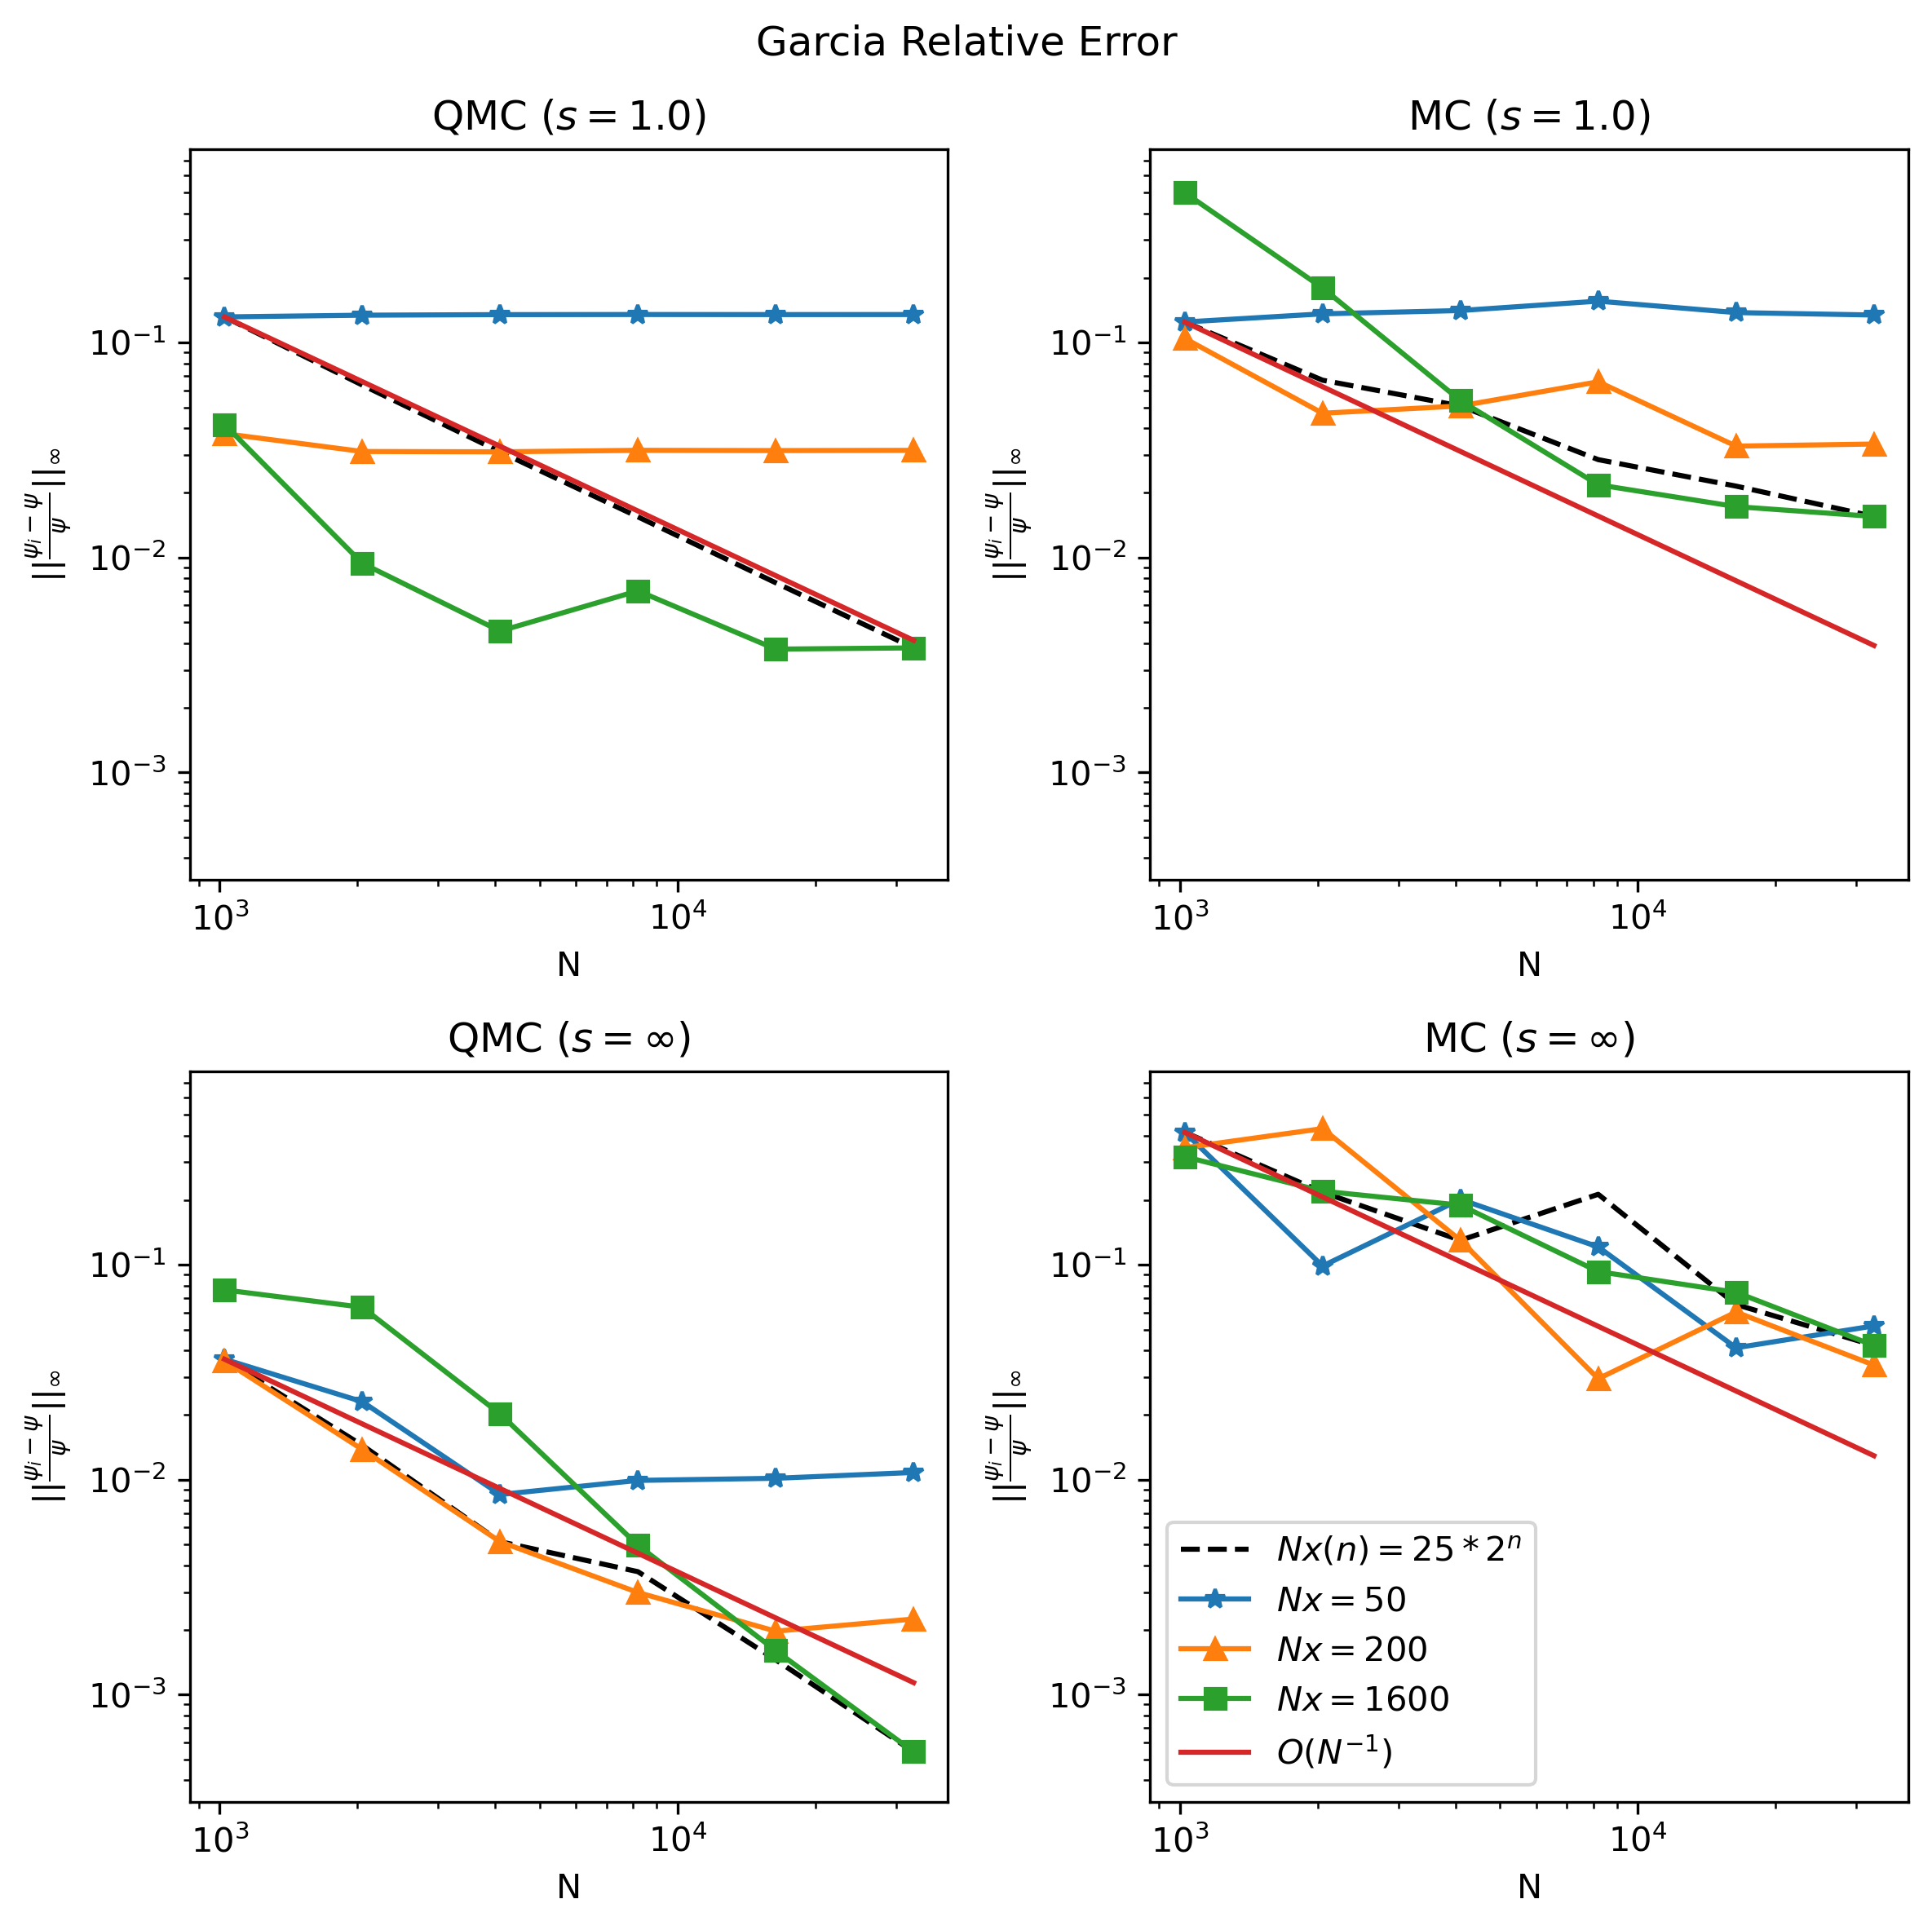

In [35]:
plt.figure(dpi=300, figsize=(8,8))
plt.suptitle("Garcia Relative Error")

ylim = [10**(-3.5), 10**(-0.1)]
ylabel = r'$||\frac{\psi_i - \psi}{\psi}||_\infty$'

#########################################################
#########################################################

data = data1Sobol
diagonal = np.diag(data)
Nx50 = data[0,:]
Nx100 = data[1,:]
Nx200 = data[2,:]
Nx400 = data[3,:]
Nx800 = data[4,:]
Nx1600 = data[5,:]
O = diagonal[0]*(Nvals[0])/(Nvals)

plt.subplot(221)
plt.title(r"QMC $(s=1.0)$")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label='Diagonal')
plt.plot(Nvals, Nx50, '*-',label='Nx = 50')
plt.plot(Nvals, Nx200, '^-',label='Nx = 200')
plt.plot(Nvals, Nx1600, 's-',label='Nx = 1600')
plt.plot(Nvals, O,label = r'$O(N^{-1})$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(ylim)

#########################################################
#########################################################

data = data1Random
diagonal = np.diag(data)
Nx50 = data[0,:]
Nx100 = data[1,:]
Nx200 = data[2,:]
Nx400 = data[3,:]
Nx800 = data[4,:]
Nx1600 = data[5,:]
O = diagonal[0]*(Nvals[0])/(Nvals)

plt.subplot(222)
plt.title(r"MC $(s=1.0)$")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label='Diagonal')
plt.plot(Nvals, Nx50, '*-',label='Nx = 50')
plt.plot(Nvals, Nx200, '^-',label='Nx = 200')
plt.plot(Nvals, Nx1600, 's-',label='Nx = 1600')
plt.plot(Nvals, O,label = r'$O(N^{-1})$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(ylim)

#########################################################
#########################################################

data = dataInfSobol
diagonal = np.diag(data)
Nx50 = data[0,:]
Nx100 = data[1,:]
Nx200 = data[2,:]
Nx400 = data[3,:]
Nx800 = data[4,:]
Nx1600 = data[5,:]
O = diagonal[0]*(Nvals[0])/(Nvals)

plt.subplot(223)
plt.title(r"QMC $(s=\infty)$")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label='Diagonal')
plt.plot(Nvals, Nx50, '*-',label='Nx = 50')
plt.plot(Nvals, Nx200, '^-',label='Nx = 200')
plt.plot(Nvals, Nx1600, 's-',label='Nx = 1600')
plt.plot(Nvals, O,label = r'$O(N^{-1})$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(ylim)

#########################################################
#########################################################

data = dataInfRandom
diagonal = np.diag(data)
Nx50 = data[0,:]
Nx100 = data[1,:]
Nx200 = data[2,:]
Nx400 = data[3,:]
Nx800 = data[4,:]
Nx1600 = data[5,:]
O = diagonal[0]*(Nvals[0])/(Nvals)

plt.subplot(224)
plt.title(r"MC $(s=\infty)$")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label=r'$Nx(n)=25*2^{n}$')
plt.plot(Nvals, Nx50, '*-',label=r'$Nx=50$')
plt.plot(Nvals, Nx200, '^-',label=r'$Nx=200$')
plt.plot(Nvals, Nx1600, 's-',label=r'$Nx=1600$')
plt.plot(Nvals, O,label = r'$O(N^{-1})$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(ylim)
#plt.xticks(Nvals, Nvals)
plt.legend()
#plt.legend(loc=(1.04,0.64))
plt.tight_layout()


In [9]:
data = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/MultiGroup/ErrTab(6-6, -5).dat")
table = pd.DataFrame(data, columns = Nvals, index = NxVals)
print("**************************** MultiGroup ****************************")
print(table)

**************************** MultiGroup ****************************
          1024      2048      4096      8192      16384     32768
50     0.074472  0.056613  0.028927  0.020458  0.004391  0.001776
100    0.147123  0.111852  0.055687  0.042075  0.006965  0.004414
200    0.286663  0.138702  0.087745  0.057144  0.015567  0.008651
400    0.591653  0.236821  0.150866  0.090128  0.028441  0.013228
800    2.295230  0.559149  0.259410  0.138284  0.050785  0.029494
1600  78.628626  2.289950  0.596488  0.248526  0.107215  0.049814


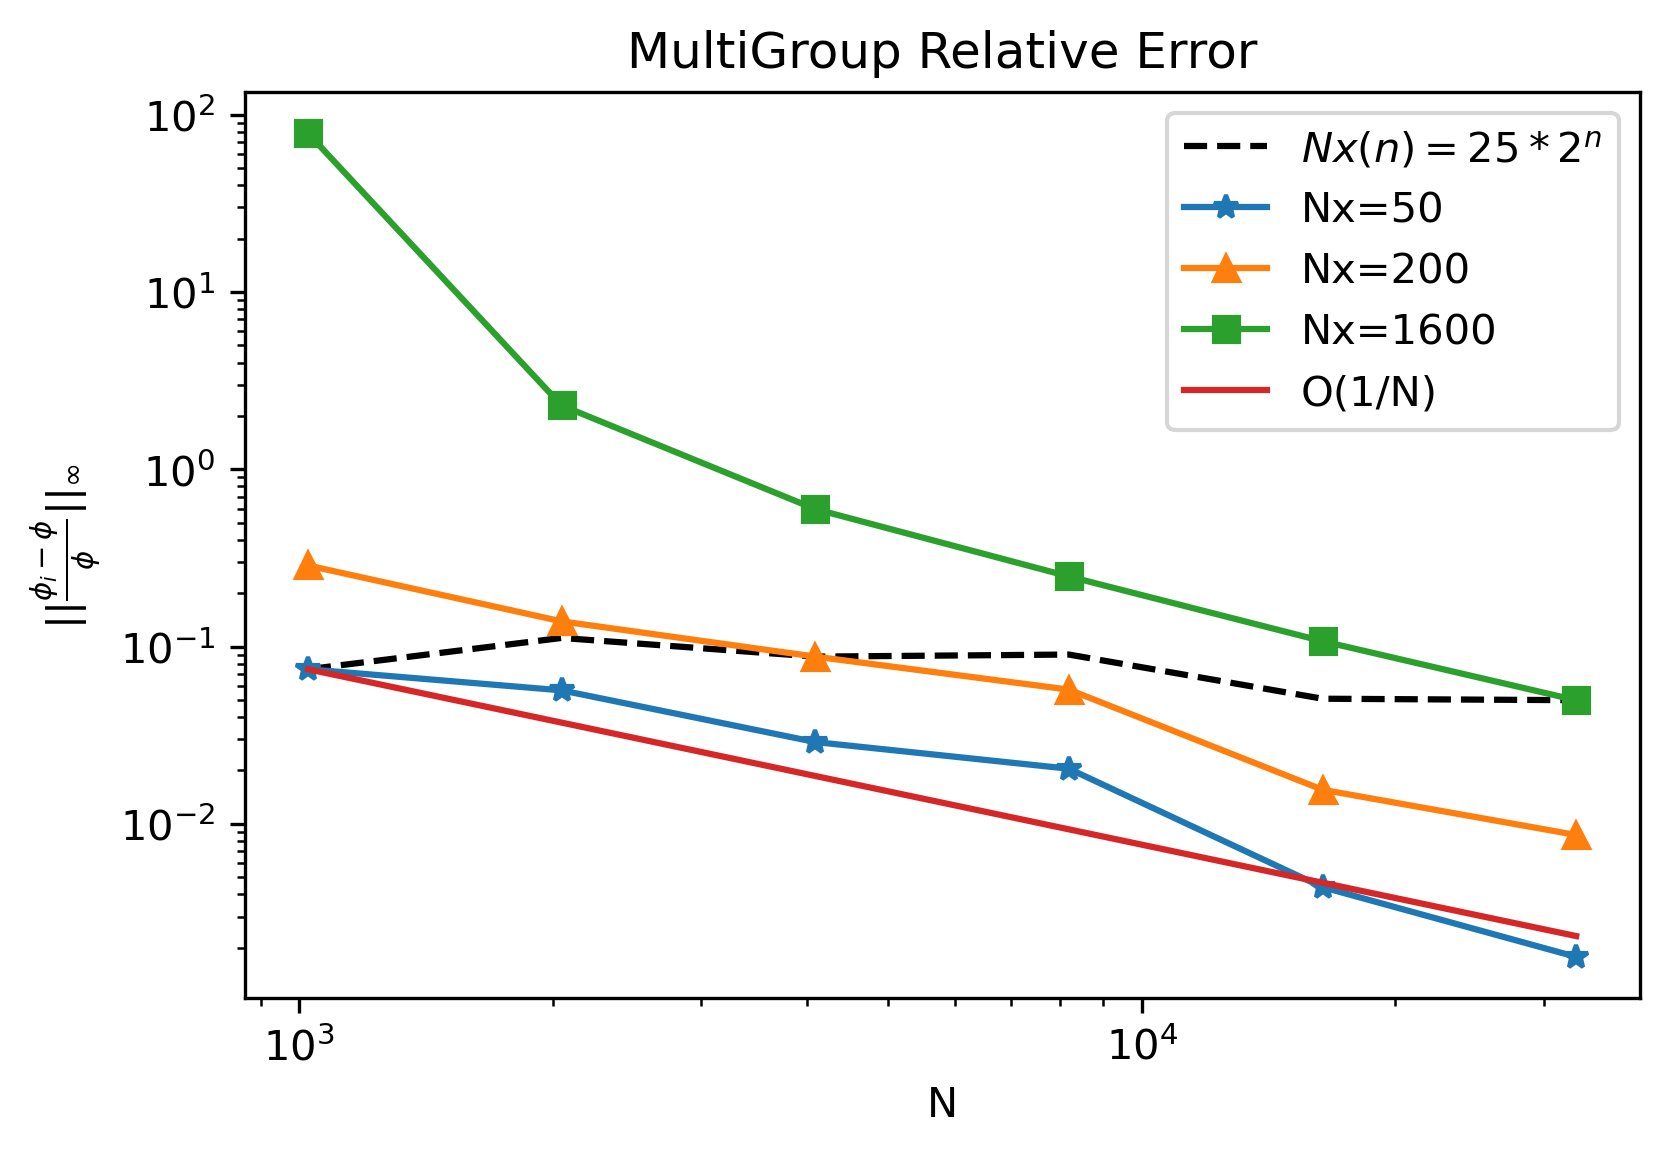

In [10]:
diagonal = np.diag(data)
Nx50 = data[0,:]
Nx100 = data[1,:]
Nx200 = data[2,:]
Nx400 = data[3,:]
Nx800 = data[4,:]
Nx1600 = data[5,:]
O = diagonal[0]*(Nvals[0])/(Nvals)

plt.figure(dpi=300)
ylabel = r'$||\frac{\phi_i - \phi}{\phi}||_\infty$'


plt.title("MultiGroup Relative Error")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label=r'$Nx(n)=25*2^{n}$')
plt.plot(Nvals, Nx50, '*-',label=r'Nx=50')
plt.plot(Nvals, Nx200, '^-',label=r'Nx=200')
plt.plot(Nvals, Nx1600, 's-',label=r'Nx=1600')
plt.plot(Nvals, O, label = 'O(1/N)')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [45]:
dataSobol = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/Data/ErrTabReedSobol(6-6, -5).dat")
dataRandom = np.genfromtxt("/Users/sampasmann/Documents/GitHub/Krylov_QMC/Examples/Data/ErrTabReedRandom(6-6, -5).dat")


NxVals = 32*np.array([1, 2, 4, 8, 16, 32])

table = pd.DataFrame(dataSobol, columns = Nvals, index = NxVals)
print("**************************** Reeds Sobol ****************************")
print(table)
table = pd.DataFrame(dataRandom, columns = Nvals, index = NxVals)
print("**************************** Reeds Random ****************************")
print(table)

**************************** Reeds Sobol ****************************
         1024      2048      4096      8192      16384     32768
32    0.241641  0.126103  0.066652  0.043596  0.062751  0.040107
64    0.499851  0.252753  0.134643  0.085747  0.052609  0.034814
128   0.973935  0.483159  0.256688  0.156291  0.095691  0.062496
256   1.569487  0.774025  0.408706  0.240454  0.147806  0.095444
512   2.083570  1.026084  0.539463  0.311372  0.192047  0.123337
1024  3.615742  1.874263  0.724668  0.358506  0.221556  0.141976
**************************** Reeds Random ****************************
         1024      2048      4096      8192      16384     32768
32    0.379573  0.913917  0.537414  0.225027  0.508980  0.372487
64    0.709809  1.304404  0.674827  0.524850  0.521593  0.408895
128   0.865598  1.952450  0.855645  0.592979  0.613157  0.480393
256   1.391769  2.309187  1.046582  0.604166  0.625827  0.608275
512   2.029977  2.675549  1.210906  0.605798  0.781409  0.750597
1024  3.628907

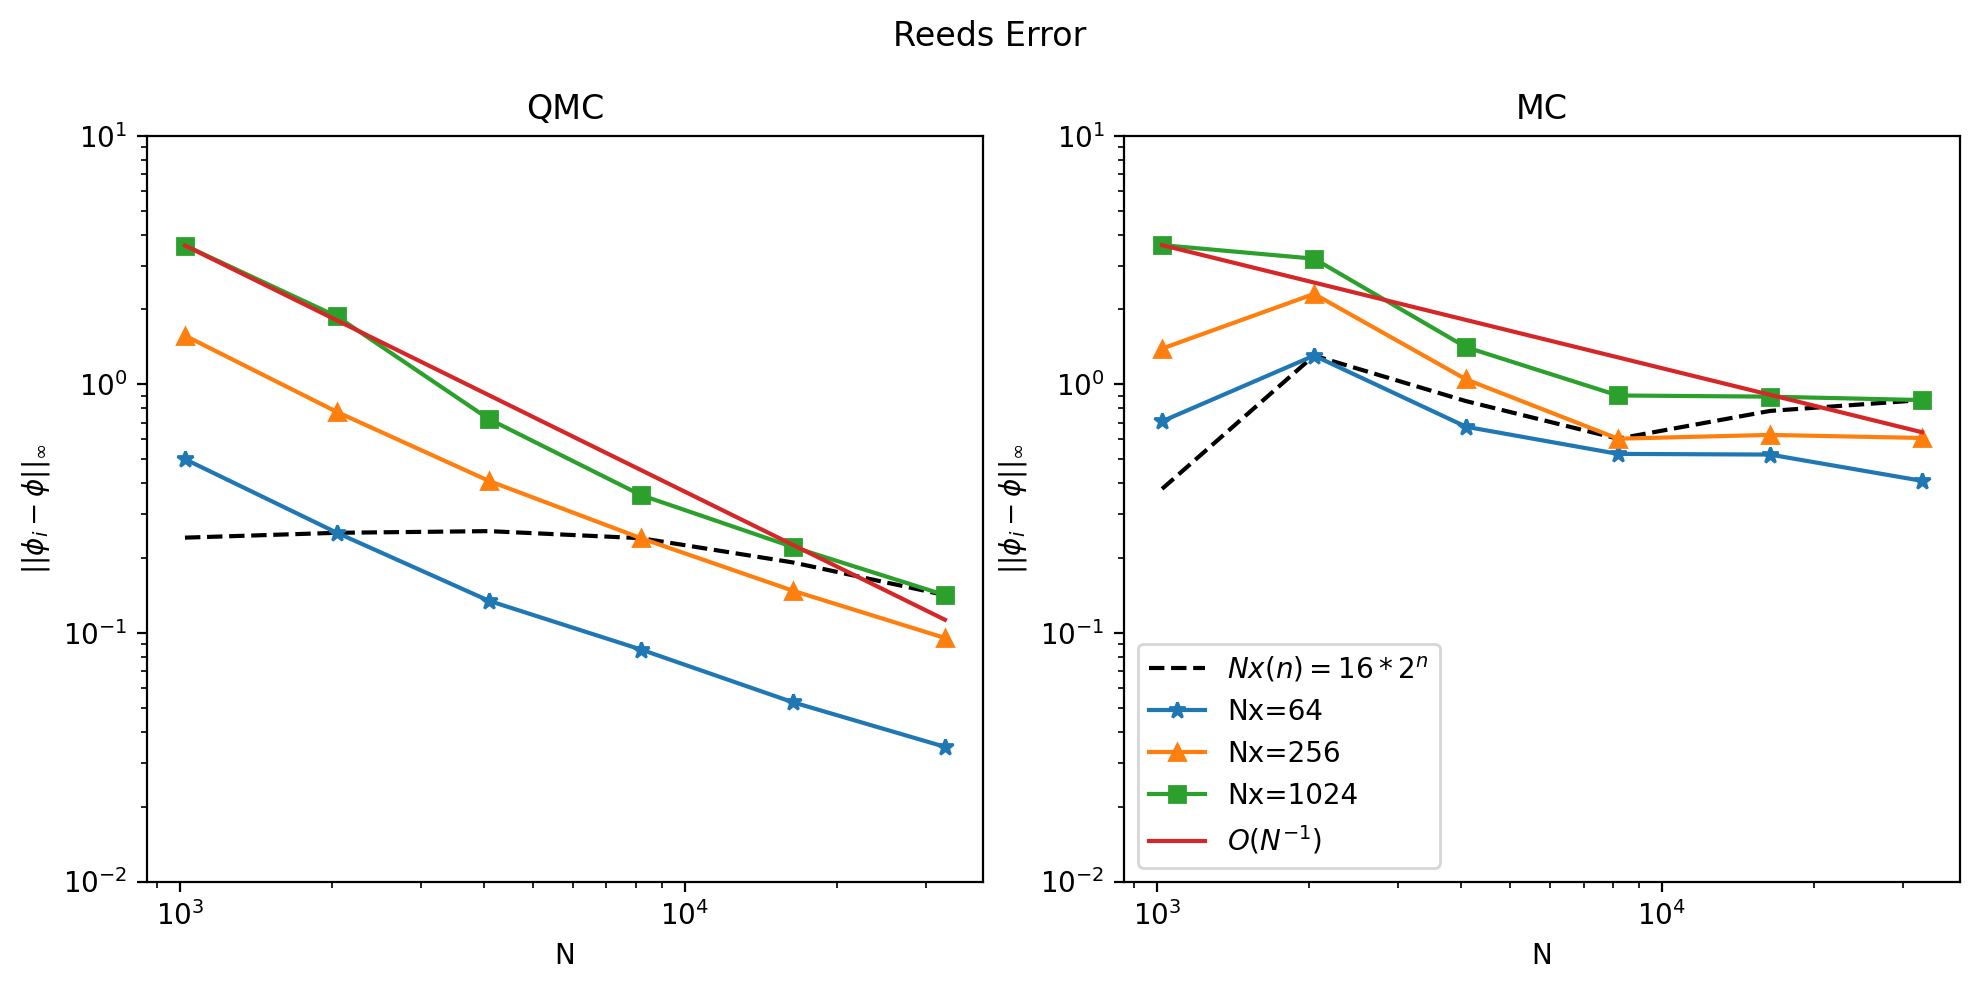

In [47]:
plt.figure(dpi=200,figsize=(10,5))
ylabel = r'$||\phi_i - \phi||_\infty$'
ylim = [10**(-2), 10**(1)]
plt.suptitle("Reeds Error")

####################################################
data = dataSobol
diagonal = np.diag(data)
Nx32 = data[0,:]
Nx64 = data[1,:]
Nx128 = data[2,:]
Nx256 = data[3,:]
Nx512 = data[4,:]
Nx1024 = data[5,:]
O = Nx1024[0]*(Nvals[0])/(Nvals)

plt.subplot(121)
plt.title("QMC")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label=r'$Nx(n)=16*2^{n}$')
plt.plot(Nvals, Nx64, '*-',label=r'Nx=64')
plt.plot(Nvals, Nx256, '^-',label=r'Nx=256')
plt.plot(Nvals, Nx1024, 's-',label=r'Nx=1024')
plt.plot(Nvals, O, label = r'$O(N^{-1})$')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.ylim(ylim)
#plt.legend()

####################################################

data = dataRandom
diagonal = np.diag(data)
Nx32 = data[0,:]
Nx64 = data[1,:]
Nx128 = data[2,:]
Nx256 = data[3,:]
Nx512 = data[4,:]
Nx1024 = data[5,:]
O = Nx1024[0]*np.sqrt(Nvals[0]/Nvals)

plt.subplot(122)
plt.title("MC")
plt.ylabel(ylabel)
plt.xlabel("N")
plt.plot(Nvals, diagonal, 'k--',label=r'$Nx(n)=16*2^{n}$')
plt.plot(Nvals, Nx64, '*-',label=r'Nx=64')
plt.plot(Nvals, Nx256, '^-',label=r'Nx=256')
plt.plot(Nvals, Nx1024, 's-',label=r'Nx=1024')
plt.plot(Nvals, O, label = r'$O(N^{-1})$')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.ylim(ylim)
plt.legend()

